# GPU Mining Rig vs. Buying Crypto

Analysis on whether holding a mining rig is more profitable than just buying the crypto asset. <br>
1. Calculate the cost of mining rig. Price and Hashing Power<br>
2. Calculate the over time how much profit the rig can make<br>
    2.1 Calculate historical mining profitability<br>
    2.

In [1]:
rig_hash_power = 100

In [2]:
#Clean eth_mining_probitability.txt


%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import json
from io import StringIO
import matplotlib.pyplot as plt

In [3]:

stri = open('data/eth_mining_profitability.txt', 'r').read()

stri = stri.replace('new Date("',"")
stri = stri.replace('")',"")
stri = stri.replace("],[", "\n")
stri = stri.replace("[", "")
stri = stri.replace("]", "")


In [4]:

df = pd.read_csv(StringIO(stri), index_col=0, header=None)
df = df.rename(columns={1 : "USD per MH"})
df.index.names = ['Date']
df.index = pd.to_datetime(df.index)


In [5]:
eth_min_prof_df = df

In [6]:
eth_min_prof_df

,USD per MH
Date,
2015-07-30,9.3550
2015-07-31,2.1920
2015-08-01,1.4420
2015-08-02,1.0220
2015-08-03,0.9310
...,...
2021-01-30,0.0866
2021-01-31,0.0903
2021-02-01,0.0934


In [7]:
#drop 2015
eth_min_prof_df = eth_min_prof_df.drop(eth_min_prof_df.loc['2015'].index)

In [8]:


eth_min_prof_df['Day Profit'] = eth_min_prof_df['USD per MH'] * rig_hash_power
#eth_min_prof_df['ETH Profit'] = 

In [9]:
eth_min_prof_df

,USD per MH,Day Profit
Date,,
2016-01-01,0.0476,4.76
2016-01-02,0.0501,5.01
2016-01-03,0.0498,4.98
2016-01-04,0.0493,4.93
2016-01-05,0.0496,4.96
...,...,...
2021-01-30,0.0866,8.66
2021-01-31,0.0903,9.03
2021-02-01,0.0934,9.34


In [10]:
#get prices for period

yf_startDate = eth_min_prof_df.index[0].strftime("%Y-%m-%d")
yf_endDate = eth_min_prof_df.index[-1].strftime("%Y-%m-%d")
crypto_df = yf.download('ETH-USD', 
                      start=yf_startDate, 
                      end=yf_endDate,
                        auto_adjust=True)


crypto_df = crypto_df.drop(columns=['Open', 'Volume', 'High', 'Low'])
crypto_df.columns = ['ETH-USD']

[*********************100%***********************]  1 of 1 completed


In [11]:
crypto_df.shift(0)

,ETH-USD
Date,
2015-12-31,0.933542
2016-01-01,0.948024
2016-01-02,0.937124
2016-01-03,0.971905
2016-01-04,0.954480
...,...
2021-01-29,1382.522827
2021-01-30,1376.115479
2021-01-31,1314.986206


In [12]:
eth_min_prof_df['ETH per MH'] = eth_min_prof_df['USD per MH'] / crypto_df['ETH-USD']
eth_min_prof_df['ETH Mined'] = eth_min_prof_df['ETH per MH'] * rig_hash_power

In [13]:
subset_df = eth_min_prof_df.dropna()
subset_df = subset_df.loc['2017-07-01' :]

In [14]:
ifconvertdailyUSD = eth_min_prof_df.loc[yf_startDate :]['Day Profit'].sum()

In [15]:
subset_df['ETH Mined Cum.'] = subset_df['ETH Mined'].cumsum()

In [16]:
subset_df

,USD per MH,Day Profit,ETH per MH,ETH Mined,ETH Mined Cum.
Date,,,,,
2017-07-01,0.1160,11.60,0.000422,0.042243,0.042243
2017-07-02,0.1140,11.40,0.000396,0.039585,0.081828
2017-07-03,0.1180,11.80,0.000417,0.041711,0.123539
2017-07-04,0.1150,11.50,0.000421,0.042078,0.165617
2017-07-05,0.1100,11.00,0.000409,0.040927,0.206544
...,...,...,...,...,...
2021-01-29,0.0955,9.55,0.000069,0.006908,13.348210
2021-01-30,0.0866,8.66,0.000063,0.006293,13.354503
2021-01-31,0.0903,9.03,0.000069,0.006867,13.361370


In [17]:
total_eth_mined = subset_df['ETH Mined'].sum()
total_ethusd_mined = total_eth_mined * crypto_df.tail(1)
total_ethusd_mined = total_ethusd_mined.iloc[0]['ETH-USD']

<AxesSubplot:title={'center':'Cumulative ETH mined (ETH)'}, xlabel='Date'>

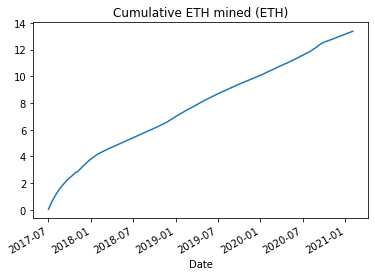

In [18]:
subset_df['ETH Mined Cum.'].plot(title="Cumulative ETH mined (ETH)")

In [19]:
subset_df['Day Profit Cum. (USD)'] = subset_df['Day Profit'].cumsum()

In [20]:
subset_df

,USD per MH,Day Profit,ETH per MH,ETH Mined,ETH Mined Cum.,Day Profit Cum. (USD)
Date,,,,,,
2017-07-01,0.1160,11.60,0.000422,0.042243,0.042243,11.600
2017-07-02,0.1140,11.40,0.000396,0.039585,0.081828,23.000
2017-07-03,0.1180,11.80,0.000417,0.041711,0.123539,34.800
2017-07-04,0.1150,11.50,0.000421,0.042078,0.165617,46.300
2017-07-05,0.1100,11.00,0.000409,0.040927,0.206544,57.300
...,...,...,...,...,...,...
2021-01-29,0.0955,9.55,0.000069,0.006908,13.348210,4547.964
2021-01-30,0.0866,8.66,0.000063,0.006293,13.354503,4556.624
2021-01-31,0.0903,9.03,0.000069,0.006867,13.361370,4565.654


<AxesSubplot:title={'center':'Daily mining profit (USD)'}, xlabel='Date'>

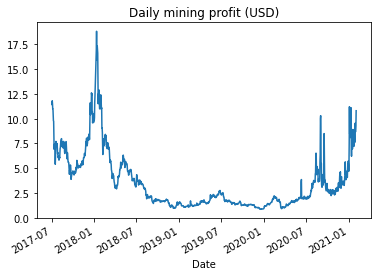

In [21]:
subset_df['Day Profit'].plot(title="Daily mining profit (USD)")

In [22]:
print("Total ETH Mined = " + str(total_eth_mined.round(2)))
print("USD Equivalent (" + str(crypto_df.index[-1].strftime("%Y-%m-%d")) + ") = " + str(total_ethusd_mined.round(2)))

Total ETH Mined = 13.38
USD Equivalent (2021-02-02) = 20266.2


In [23]:
amt_buy_eth = 2000 / crypto_df.loc['2017-07-01']['ETH-USD']

In [24]:
print("Amount of ETH for US$2000 on '2017-07-01' = " + str(amt_buy_eth.round(2)))
amt_buy_eth_hold_USD = amt_buy_eth * crypto_df.tail(1)
amt_buy_eth_hold_USD = amt_buy_eth_hold_USD.iloc[0]['ETH-USD']
print("USD Equivalent (" + str(crypto_df.index[-1].strftime("%Y-%m-%d")) + ") = " + str(amt_buy_eth_hold_USD.round(2)))

Amount of ETH for US$2000 on '2017-07-01' = 7.28
USD Equivalent (2021-02-02) = 11035.6


In [25]:
subset_df['Value of ETH Hold (US$2000)'] = amt_buy_eth * crypto_df['ETH-USD']
subset_df

,USD per MH,Day Profit,ETH per MH,ETH Mined,ETH Mined Cum.,Day Profit Cum. (USD),Value of ETH Hold (US$2000)
Date,,,,,,,
2017-07-01,0.1160,11.60,0.000422,0.042243,0.042243,11.600,2000.000000
2017-07-02,0.1140,11.40,0.000396,0.039585,0.081828,23.000,2097.494078
2017-07-03,0.1180,11.80,0.000417,0.041711,0.123539,34.800,2060.429472
2017-07-04,0.1150,11.50,0.000421,0.042078,0.165617,46.300,1990.546254
2017-07-05,0.1100,11.00,0.000409,0.040927,0.206544,57.300,1957.560052
...,...,...,...,...,...,...,...
2021-01-29,0.0955,9.55,0.000069,0.006908,13.348210,4547.964,10069.320656
2021-01-30,0.0866,8.66,0.000063,0.006293,13.354503,4556.624,10022.654050
2021-01-31,0.0903,9.03,0.000069,0.006867,13.361370,4565.654,9577.431567


In [34]:
subset_df['Value of ETH Mined Cum. (USD)'] = subset_df['ETH Mined Cum.']  *crypto_df['ETH-USD']
subset_df

,USD per MH,Day Profit,ETH per MH,ETH Mined,ETH Mined Cum.,Day Profit Cum. (USD),Value of ETH Hold (US$2000),Value of ETH Mined Cum. (USD)
Date,,,,,,,,
2017-07-01,0.1160,11.60,0.000422,0.042243,0.042243,11.600,2000.000000,11.600000
2017-07-02,0.1140,11.40,0.000396,0.039585,0.081828,23.000,2097.494078,23.565466
2017-07-03,0.1180,11.80,0.000417,0.041711,0.123539,34.800,2060.429472,34.949043
2017-07-04,0.1150,11.50,0.000421,0.042078,0.165617,46.300,1990.546254,45.263682
2017-07-05,0.1100,11.00,0.000409,0.040927,0.206544,57.300,1957.560052,55.513598
...,...,...,...,...,...,...,...,...
2021-01-29,0.0955,9.55,0.000069,0.006908,13.348210,4547.964,10069.320656,18454.204776
2021-01-30,0.0866,8.66,0.000063,0.006293,13.354503,4556.624,10022.654050,18377.338142
2021-01-31,0.0903,9.03,0.000069,0.006867,13.361370,4565.654,9577.431567,17570.017096


<AxesSubplot:title={'center':'Hold US$2000 ETH over time (USD)'}, xlabel='Date'>

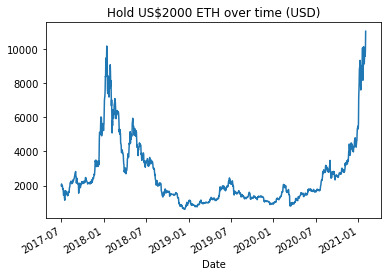

In [35]:
subset_df['Value of ETH Hold (US$2000)'].plot(title="Hold US$2000 ETH over time (USD)")

<AxesSubplot:title={'center':'Buying US$2000 of ETH vs mining ETH returns (USD, 2017-07 onwards)'}, xlabel='Date'>

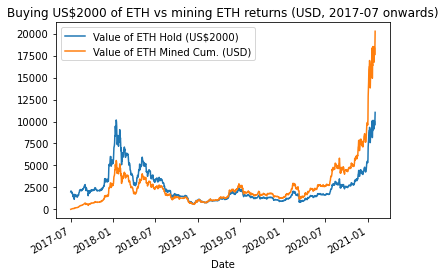

In [46]:
subset_df[['Value of ETH Hold (US$2000)','Value of ETH Mined Cum. (USD)']].plot(title="Buying US$2000 of ETH vs mining ETH returns (USD, 2017-07 onwards)")
#subset_df['Value of ETH Mined Cum. (USD)', 'Value of ETH Hold (US$2000)'].plot(title="Mine ETH over time (USD)")

In [28]:
subset_df
#subset_df['Day Profit (Cum)'].plot()

,USD per MH,Day Profit,ETH per MH,ETH Mined,ETH Mined Cum.,Day Profit Cum. (USD),Value of ETH Hold (US$2000)
Date,,,,,,,
2017-07-01,0.1160,11.60,0.000422,0.042243,0.042243,11.600,2000.000000
2017-07-02,0.1140,11.40,0.000396,0.039585,0.081828,23.000,2097.494078
2017-07-03,0.1180,11.80,0.000417,0.041711,0.123539,34.800,2060.429472
2017-07-04,0.1150,11.50,0.000421,0.042078,0.165617,46.300,1990.546254
2017-07-05,0.1100,11.00,0.000409,0.040927,0.206544,57.300,1957.560052
...,...,...,...,...,...,...,...
2021-01-29,0.0955,9.55,0.000069,0.006908,13.348210,4547.964,10069.320656
2021-01-30,0.0866,8.66,0.000063,0.006293,13.354503,4556.624,10022.654050
2021-01-31,0.0903,9.03,0.000069,0.006867,13.361370,4565.654,9577.431567


<AxesSubplot:title={'center':'ETH Mined (daily)'}, xlabel='Date'>

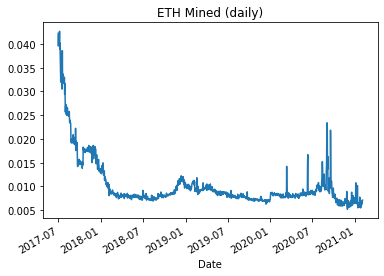

In [29]:
subset_df['ETH Mined'].plot(title="ETH Mined (daily)")

In [30]:
subset_df

,USD per MH,Day Profit,ETH per MH,ETH Mined,ETH Mined Cum.,Day Profit Cum. (USD),Value of ETH Hold (US$2000)
Date,,,,,,,
2017-07-01,0.1160,11.60,0.000422,0.042243,0.042243,11.600,2000.000000
2017-07-02,0.1140,11.40,0.000396,0.039585,0.081828,23.000,2097.494078
2017-07-03,0.1180,11.80,0.000417,0.041711,0.123539,34.800,2060.429472
2017-07-04,0.1150,11.50,0.000421,0.042078,0.165617,46.300,1990.546254
2017-07-05,0.1100,11.00,0.000409,0.040927,0.206544,57.300,1957.560052
...,...,...,...,...,...,...,...
2021-01-29,0.0955,9.55,0.000069,0.006908,13.348210,4547.964,10069.320656
2021-01-30,0.0866,8.66,0.000063,0.006293,13.354503,4556.624,10022.654050
2021-01-31,0.0903,9.03,0.000069,0.006867,13.361370,4565.654,9577.431567


In [31]:

#subset_df['Day Profit (Cum)'].plot(color='r')

In [32]:
breakeven_df = subset_df.loc[subset_df['Day Profit (Cum)'] > 2000]

KeyError: 'Day Profit (Cum)'

In [ ]:
breakeven_df